## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader']


## Read PredictIt Data Instead

In [2]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/"
    filename = "{}.xlsx".format(symbol)



    df = pd.read_excel(path + filename, skiprows=4)
    df = df.set_index("Date")
    df = df.drop(df.columns[[7,8,9]], axis=1)
    df = df.drop("ID", 1)
    df.columns = [symbol + ":" + name.lower() for name in df.columns]

    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
11/13/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/14/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/15/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/16/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/17/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0


## Plot the closing prices for all the markets

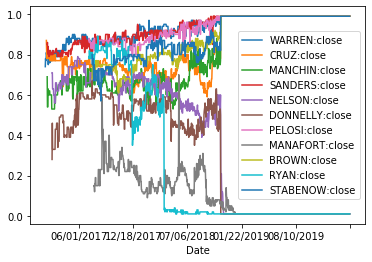

In [4]:
%matplotlib inline
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot()

## Slice just a specific time period from the dataframe

In [5]:
all_data.index = pd.to_datetime(all_data.index)

In [6]:
subset_data = all_data[(all_data.index >= '09-01-2017') & (all_data.index <= '09-04-2019')]
subset_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.85,0.85,0.85,0.85,0,0.0000,0.77,0.77,0.78,0.78,...,0.82,0.82,0,0.0000,0.72,0.69,0.72,0.70,16,0.6981
2017-09-02,0.85,0.85,0.85,0.85,0,0.0000,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.70,0.70,45,0.7000
2017-09-03,0.85,0.84,0.85,0.84,74,0.8400,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.72,0.72,1,0.7200
2017-09-04,0.84,0.84,0.85,0.85,10,0.8500,0.78,0.78,0.78,0.78,...,0.82,0.81,120,0.8100,0.72,0.72,0.72,0.72,0,0.0000
2017-09-05,0.85,0.84,0.85,0.84,43,0.8479,0.78,0.78,0.78,0.78,...,0.87,0.81,52,0.8619,0.72,0.72,0.72,0.72,9,0.7200


## Define Exchanges

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [7]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

### Doing it without adding other features. Just use price 

In [8]:
#You still have to add "Streams" for all the standard columns open, high, low, close, volume in this case
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(subset_data[name])) for name in subset_data.columns]
    

In [9]:
#Then create the Feed from it
feed = DataFeed([predictit_ns])
feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [10]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## First Launch Ray

In [11]:
#Add the deeptrader path to ALL workers, not just the current worker
import os
parent_dir = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader"
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [12]:
#Try and get rid of that yaml warning (although this only does it for THIS worker)
import yaml
yaml.warnings({'YAMLLoadWarning': False})

In [13]:
#Import tensortrade
import tensortrade

# Define Exchanges
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream


# Define External Data Feed (features)
import ta
from sklearn import preprocessing
from tensortrade.data import DataFeed, Module

# Portfolio
from tensortrade.instruments import USD, BTC
from tensortrade.wallets import Wallet, Portfolio
from tensortrade.actions import ManagedRiskOrders
from gym.spaces import Discrete

# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="simple",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog'
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)

#ray.init(ignore_reinit_error=True)

## Train using the tune way (better so far)

In [14]:
analysis = tune.run(
        "DQN",
        name = "DQN16",
        checkpoint_freq = 10,
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 100000,
        },
        config={
            "env": "ray_trading_env",
            "lr": grid_search([1e-4]),  # try different lrs
            "num_workers": 6,  # parallelism,
            #"eager": "true",
        },
        
    )

2020-03-06 13:51:10,783	INFO resource_spec.py:212 -- Starting Ray with 6.1 GiB memory available for workers and up to 3.06 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-06 13:51:11,169	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


Trial name,status,loc,lr
DQN_ray_trading_env_72aed406,RUNNING,,


(pid=42640) 2020-03-06 13:51:15,940	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=42640) 2020-03-06 13:51:17,350	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=42640) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:
(pid=42640) 
(pid=42640) WARN: Box bound precision lowered by casting to float32
(pid=42640) 
(pid=42640) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=42640) 
(pid=42640) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=42640) 
(pid=42640) 2020-03-06 13:51:19,140	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=42639) /Users/jasonfiacco/Documents/Ya

Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-51-41
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 2
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 262.351
    update_time_ms: 13.771
  iterations_since_restore: 1
  node_ip: 192.168.0.179
  num_healthy_workers: 6
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 69.540625
    ram_util_percent: 59.01875
  pid: 42640
  policy_reward_max: {}
  policy_reward_mean: {}
  policy_reward_min: {}
  sampler_perf: {

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,nan,22.0851,1008,1


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-51-55
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: 10.642
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 3.1991615295410156
        mean_q: 1.9102482795715332
        mean_td_error: 0.11912571638822556
        min_q: 0.505547821521759
        model: {}
    num_steps_sampled: 2016
    num_steps_trained: 1344
    num_target_updates: 4
    opt_peak_throughput: 3007.067
    opt_samples: 32.0
    replay_time_ms: 4.235
    sample_time_ms: 318.928
    update_time_ms: 13.49
  iterations_since_restore: 2
  node_ip: 192.168.0.

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,nan,36.434,2016,2


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-52-11
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    grad_time_ms: 10.793
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 6.226768970489502
        mean_q: 3.8144307136535645
        mean_td_error: 0.23849664628505707
        min_q: 1.5326957702636719
        model: {}
    num_steps_sampled: 3024
    num_steps_trained: 2688
    num_target_updates: 6
    opt_peak_throughput: 2964.958
    opt_samples: 32.0
    replay_time_ms: 4.146
    sample_time

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,nan,52.3982,3024,3


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-52-29
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    grad_time_ms: 10.461
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 7.533580780029297
        mean_q: 5.211428165435791
        mean_td_error: 0.1535414606332779
        min_q: 2.0711774826049805
        model: {}
    num_steps_sampled: 4032
    num_steps_trained: 4032
    num_target_updates: 8
    opt_peak_throughput: 3058.836
    opt_samples: 32.0
    replay_time_ms: 3.675
    sample_time_m

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,nan,70.0771,4032,4


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-52-43
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.11074096389539362
  episode_reward_min: -0.5518239561884073
  episodes_this_iter: 6
  episodes_total: 6
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    grad_time_ms: 10.493
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.333191871643066
        mean_q: 7.032613277435303
        mean_td_error: -0.06091120094060898
        min_q: 3.8472094535827637
        model: {}
    num_steps_sampled: 5040
    num_steps_trained: 5376
    num_target_updates: 10
    opt_peak_throughput: 3049.751
    opt_samples: 3

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.110741,84.5549,5040,5


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-52-57
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.11074096389539362
  episode_reward_min: -0.5518239561884073
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    grad_time_ms: 10.329
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.020151138305664
        mean_q: 8.243571281433105
        mean_td_error: -0.16254553198814392
        min_q: 3.5176515579223633
        model: {}
    num_steps_sampled: 6048
    num_steps_trained: 6720
    num_target_updates: 12
    opt_peak_throughput: 3098.157
    opt_samples: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.110741,98.29,6048,6


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-53-13
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.11074096389539362
  episode_reward_min: -0.5518239561884073
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    grad_time_ms: 10.342
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.811539649963379
        mean_q: 9.687056541442871
        mean_td_error: 0.21243804693222046
        min_q: 2.907304286956787
        model: {}
    num_steps_sampled: 7056
    num_steps_trained: 8064
    num_target_updates: 14
    opt_peak_throughput: 3094.293
    opt_samples: 32

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.110741,114.252,7056,7


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-53-30
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.11074096389539362
  episode_reward_min: -0.5518239561884073
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    grad_time_ms: 10.089
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.540035247802734
        mean_q: 10.241796493530273
        mean_td_error: 0.4940152168273926
        min_q: 5.067418575286865
        model: {}
    num_steps_sampled: 8064
    num_steps_trained: 9408
    num_target_updates: 16
    opt_peak_throughput: 3171.924
    opt_sampl

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.110741,131.254,8064,8


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-53-52
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.03964035241412061
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 12
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    grad_time_ms: 10.152
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.338540077209473
        mean_q: 10.39184284210205
        mean_td_error: -0.03205648064613342
        min_q: 4.716153621673584
        model: {}
    num_steps_sampled: 9072
    num_steps_trained: 10752
    num_target_updates: 18
    opt_peak_throughput: 3151.938
    opt_sa

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0396404,152.975,9072,9


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-54-11
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.03964035241412061
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    grad_time_ms: 10.349
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 14.002776145935059
        mean_q: 11.162654876708984
        mean_td_error: 0.09867855161428452
        min_q: 4.596843719482422
        model: {}
    num_steps_sampled: 10080
    num_steps_trained: 12096
    num_target_updates: 20
    opt_peak_throughput: 3091.997
    opt_s

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0396404,172.353,10080,10


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-54-32
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.03964035241412061
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    grad_time_ms: 10.433
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 14.392364501953125
        mean_q: 12.455869674682617
        mean_td_error: 0.12088777124881744
        min_q: 7.732279300689697
        model: {}
    num_steps_sampled: 11088
    num_steps_trained: 13440
    num_target_updates: 22
    opt_peak_throughput: 3067.308
    opt_samples: 32.0

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0396404,193.214,11088,11


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-54-55
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.03964035241412061
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.246
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 14.189461708068848
        mean_q: 12.312108039855957
        mean_td_error: 0.05812044441699982
        min_q: 4.323483467102051
        model: {}
    num_steps_sampled: 12096
    num_steps_trained: 14784
    num_target_updates: 24
    opt_peak_throughput: 3123.144
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0396404,215.943,12096,12


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-55-18
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.03964035241412061
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.311
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.084007263183594
        mean_q: 12.40428638458252
        mean_td_error: -0.12929655611515045
        min_q: 5.366796493530273
        model: {}
    num_steps_sampled: 13104
    num_steps_trained: 16128
    num_target_updates: 26
    opt_peak_throughput: 3103.422
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0396404,238.78,13104,13


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-55-31
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.01587846295369167
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 18
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.609
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 14.553187370300293
        mean_q: 12.812982559204102
        mean_td_error: -0.013390868902206421
        min_q: 9.027174949645996
        model: {}
    num_steps_sampled: 14112
    num_steps_trained: 17472
    num_target_updates: 28
    opt_peak_throughput: 3016.224
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0158785,251.682,14112,14


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-55-44
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.015878462953691656
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.545
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.290912628173828
        mean_q: 12.935483932495117
        mean_td_error: -0.026652410626411438
        min_q: 5.851693153381348
        model: {}
    num_steps_sampled: 15120
    num_steps_trained: 18816
    num_target_updates: 30
    opt_peak_throughput: 3034.479


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0158785,265.185,15120,15


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-55-58
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.015878462953691656
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.57
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 14.488163948059082
        mean_q: 12.848174095153809
        mean_td_error: 0.12187269330024719
        min_q: 10.712979316711426
        model: {}
    num_steps_sampled: 16128
    num_steps_trained: 20160
    num_target_updates: 32
    opt_peak_throughput: 3027.449
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0158785,279.333,16128,16


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-56-14
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.205734866442074
  episode_reward_mean: 0.015878462953691656
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.919
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.159881591796875
        mean_q: 12.959135055541992
        mean_td_error: -0.08466388285160065
        min_q: 5.681342601776123
        model: {}
    num_steps_sampled: 17136
    num_steps_trained: 21504
    num_target_updates: 34
    opt_peak_throughput: 2930.761
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.0158785,294.68,17136,17


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-56-27
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.20235922184764302
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 24
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.771
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.406352996826172
        mean_q: 13.326311111450195
        mean_td_error: -0.14579416811466217
        min_q: 5.578001499176025
        model: {}
    num_steps_sampled: 18144
    num_steps_trained: 22848
    num_target_updates: 36
    opt_peak_throughput: 2970.911
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.202359,308.148,18144,18


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-56-39
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.20235922184764302
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 24
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.482
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.837480545043945
        mean_q: 13.766342163085938
        mean_td_error: 0.035867661237716675
        min_q: 10.977117538452148
        model: {}
    num_steps_sampled: 19152
    num_steps_trained: 24192
    num_target_updates: 38
    opt_peak_throughput: 3052.963
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.202359,320.24,19152,19


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-56-53
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.20235922184764302
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 24
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.921
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.48439598083496
        mean_q: 13.958650588989258
        mean_td_error: 0.14090178906917572
        min_q: 10.115080833435059
        model: {}
    num_steps_sampled: 20160
    num_steps_trained: 25536
    num_target_updates: 40
    opt_peak_throughput: 2930.179
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.202359,333.641,20160,20


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-57-08
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.20235922184764302
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 24
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.484
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.22734260559082
        mean_q: 14.488994598388672
        mean_td_error: 0.12857168912887573
        min_q: 12.34480094909668
        model: {}
    num_steps_sampled: 21168
    num_steps_trained: 26880
    num_target_updates: 42
    opt_peak_throughput: 3052.394
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.202359,348.825,21168,21


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-57-26
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.1986835676965003
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 30
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.519
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.458648681640625
        mean_q: 14.205080032348633
        mean_td_error: 0.37357163429260254
        min_q: 11.739988327026367
        model: {}
    num_steps_sampled: 22176
    num_steps_trained: 28224
    num_target_updates: 44
    opt_peak_throughput: 3042.251
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.198684,366.926,22176,22


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-57-45
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.19868356769650033
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.529
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.099336624145508
        mean_q: 14.5655517578125
        mean_td_error: -0.05524909496307373
        min_q: 9.165569305419922
        model: {}
    num_steps_sampled: 23184
    num_steps_trained: 29568
    num_target_updates: 46
    opt_peak_throughput: 3039.33
    o

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.198684,385.785,23184,23


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-58-04
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.19868356769650033
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.904
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.959325790405273
        mean_q: 14.416053771972656
        mean_td_error: 0.09505021572113037
        min_q: 10.330572128295898
        model: {}
    num_steps_sampled: 24192
    num_steps_trained: 30912
    num_target_updates: 48
    opt_peak_throughput: 2934.619
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.198684,404.663,24192,24


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-58-23
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.19868356769650033
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.609
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.92736053466797
        mean_q: 14.645685195922852
        mean_td_error: -0.07953554391860962
        min_q: 10.958093643188477
        model: {}
    num_steps_sampled: 25200
    num_steps_trained: 32256
    num_target_updates: 50
    opt_peak_throughput: 3016.271
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.198684,423.478,25200,25


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-58-44
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.805279673215138
  episode_reward_mean: 0.19868356769650033
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.573
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.388532638549805
        mean_q: 14.075305938720703
        mean_td_error: 0.018945977091789246
        min_q: 7.152355670928955
        model: {}
    num_steps_sampled: 26208
    num_steps_trained: 33600
    num_target_updates: 52
    opt_peak_throughput: 3026.576
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.198684,445.041,26208,26


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-59-01
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.2477354708119242
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 36
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.484
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.643421173095703
        mean_q: 14.184446334838867
        mean_td_error: -0.0021053850650787354
        min_q: 11.740078926086426
        model: {}
    num_steps_sampled: 27216
    num_steps_trained: 34944
    num_target_updates: 54
    opt_peak_throughput: 3052.13


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247735,461.279,27216,27


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-59-14
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.24773547081192415
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.673
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.471710205078125
        mean_q: 14.182394027709961
        mean_td_error: 0.3765152096748352
        min_q: 6.813839912414551
        model: {}
    num_steps_sampled: 28224
    num_steps_trained: 36288
    num_target_updates: 56
    opt_peak_throughput: 2998.187
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247735,474.455,28224,28


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-59-29
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.24773547081192415
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.604
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.163921356201172
        mean_q: 14.513463973999023
        mean_td_error: 0.09007097780704498
        min_q: 9.525129318237305
        model: {}
    num_steps_sampled: 29232
    num_steps_trained: 37632
    num_target_updates: 58
    opt_peak_throughput: 3017.634
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247735,489.381,29232,29


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-59-45
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.24773547081192415
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.294
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.06997299194336
        mean_q: 14.610298156738281
        mean_td_error: 0.05290257930755615
        min_q: 11.880218505859375
        model: {}
    num_steps_sampled: 30240
    num_steps_trained: 38976
    num_target_updates: 60
    opt_peak_throughput: 3108.496
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247735,505.032,30240,30


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_13-59-59
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.24684656643647954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 42
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.622
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 18.140241622924805
        mean_q: 14.775903701782227
        mean_td_error: -0.07217830419540405
        min_q: 12.882869720458984
        model: {}
    num_steps_sampled: 31248
    num_steps_trained: 40320
    num_target_updates: 62
    opt_peak_throughput: 3012.48
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.246847,519.633,31248,31


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-00-12
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.24684656643647954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 42
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.55
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.955951690673828
        mean_q: 14.11620807647705
        mean_td_error: -0.044836923480033875
        min_q: 7.995156764984131
        model: {}
    num_steps_sampled: 32256
    num_steps_trained: 41664
    num_target_updates: 64
    opt_peak_throughput: 3033.155
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.246847,532.272,32256,32


(pid=raylet) E0306 14:00:18.248610 334597568 node_manager.cc:3118] Plasma object 63a09a8058a8e59a54761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-00-26
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.24684656643647954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 42
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.524
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.730268478393555
        mean_q: 14.852385520935059
        mean_td_error: -0.14339202642440796
     

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.246847,546.296,33264,33


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-00-42
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.24684656643647954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 42
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.714
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.191926956176758
        mean_q: 14.641947746276855
        mean_td_error: 0.07950139045715332
        min_q: 11.36365032196045
        model: {}
    num_steps_sampled: 34272
    num_steps_trained: 44352
    num_target_updates: 68
    opt_peak_throughput: 2986.725
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.246847,561.874,34272,34


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-00-58
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.2672834332706954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 48
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.881
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.394113540649414
        mean_q: 14.588346481323242
        mean_td_error: -0.0834830105304718
        min_q: 11.973883628845215
        model: {}
    num_steps_sampled: 35280
    num_steps_trained: 45696
    num_target_updates: 70
    opt_peak_throughput: 2940.785
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.267283,578.313,35280,35


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-01-17
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.2672834332706954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.319
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.454668045043945
        mean_q: 14.798784255981445
        mean_td_error: 0.054582417011260986
        min_q: 9.227631568908691
        model: {}
    num_steps_sampled: 36288
    num_steps_trained: 47040
    num_target_updates: 72
    opt_peak_throughput: 3100.991
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.267283,597.579,36288,36


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-01-39
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.2672834332706954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.487
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.026639938354492
        mean_q: 14.437600135803223
        mean_td_error: 0.5051781535148621
        min_q: 9.29723072052002
        model: {}
    num_steps_sampled: 37296
    num_steps_trained: 48384
    num_target_updates: 74
    opt_peak_throughput: 3051.464
    o

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.267283,618.714,37296,37


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-03-28
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.2672834332706954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.26
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.25945472717285
        mean_q: 14.068076133728027
        mean_td_error: 0.11579984426498413
        min_q: 10.935844421386719
        model: {}
    num_steps_sampled: 38304
    num_steps_trained: 49728
    num_target_updates: 76
    opt_peak_throughput: 3119.058
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.267283,728.16,38304,38


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-03-51
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.1748016121950813
  episode_reward_mean: 0.2672834332706954
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.704
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.77288818359375
        mean_q: 14.44840145111084
        mean_td_error: -0.008431494235992432
        min_q: 12.335943222045898
        model: {}
    num_steps_sampled: 39312
    num_steps_trained: 51072
    num_target_updates: 78
    opt_peak_throughput: 2989.459
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.267283,751.295,39312,39


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-04-15
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.6487885305138192
  episode_reward_mean: 0.3139581312548803
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 54
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.21
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.395193099975586
        mean_q: 14.105670928955078
        mean_td_error: -0.07711151242256165
        min_q: 12.29896354675293
        model: {}
    num_steps_sampled: 40320
    num_steps_trained: 52416
    num_target_updates: 80
    opt_peak_throughput: 2854.512
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.313958,775.016,40320,40


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-06-43
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.6487885305138192
  episode_reward_mean: 0.31395813125488037
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.244
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.011363983154297
        mean_q: 14.299138069152832
        mean_td_error: -0.0025052130222320557
        min_q: 12.541915893554688
        model: {}
    num_steps_sampled: 41328
    num_steps_trained: 53760
    num_target_updates: 82
    opt_peak_throughput: 3123.77

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.313958,922.69,41328,41


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-06-57
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.6487885305138192
  episode_reward_mean: 0.31395813125488037
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.259
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.453954696655273
        mean_q: 13.994121551513672
        mean_td_error: -0.09326556324958801
        min_q: 12.622679710388184
        model: {}
    num_steps_sampled: 42336
    num_steps_trained: 55104
    num_target_updates: 84
    opt_peak_throughput: 3119.123


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.313958,936.884,42336,42


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-07-13
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.6487885305138192
  episode_reward_mean: 0.31395813125488037
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.77
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.246660232543945
        mean_q: 13.961180686950684
        mean_td_error: -0.08656090497970581
        min_q: 12.082530975341797
        model: {}
    num_steps_sampled: 43344
    num_steps_trained: 56448
    num_target_updates: 86
    opt_peak_throughput: 2971.161
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.313958,952.541,43344,43


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-08-32
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.37945838677610805
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 60
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 17.443
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.664761543273926
        mean_q: 13.48623275756836
        mean_td_error: -0.04428461194038391
        min_q: 9.434975624084473
        model: {}
    num_steps_sampled: 44352
    num_steps_trained: 57792
    num_target_updates: 88
    opt_peak_throughput: 1834.598
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.379458,1031.57,44352,44


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-08-45
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.37945838677610805
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 60
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.106
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.852688789367676
        mean_q: 13.47331428527832
        mean_td_error: -0.0019939541816711426
        min_q: 11.722811698913574
        model: {}
    num_steps_sampled: 45360
    num_steps_trained: 59136
    num_target_updates: 90
    opt_peak_throughput: 3166.289


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.379458,1045.31,45360,45


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-09-00
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.37945838677610805
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 60
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.646
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 17.155153274536133
        mean_q: 13.890852928161621
        mean_td_error: -0.06826320290565491
        min_q: 12.135331153869629
        model: {}
    num_steps_sampled: 46368
    num_steps_trained: 60480
    num_target_updates: 92
    opt_peak_throughput: 3005.862
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.379458,1059.95,46368,46


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-12-40
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.37945838677610805
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 60
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.531
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.133377075195312
        mean_q: 13.52261734008789
        mean_td_error: 0.03442510962486267
        min_q: 10.627371788024902
        model: {}
    num_steps_sampled: 47376
    num_steps_trained: 61824
    num_target_updates: 94
    opt_peak_throughput: 2775.037
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.379458,1279.44,47376,47


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-13-17
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.34213786068176394
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 66
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.8
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.351844787597656
        mean_q: 13.56993293762207
        mean_td_error: 0.5779184699058533
        min_q: 11.863287925720215
        model: {}
    num_steps_sampled: 48384
    num_steps_trained: 63168
    num_target_updates: 96
    opt_peak_throughput: 1616.166
    op

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.342138,1317.15,48384,48


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-15-05
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.342137860681764
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 27.59
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 16.082569122314453
        mean_q: 12.830864906311035
        mean_td_error: 0.023314207792282104
        min_q: 9.308241844177246
        model: {}
    num_steps_sampled: 49392
    num_steps_trained: 64512
    num_target_updates: 98
    opt_peak_throughput: 1159.821
    o

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.342138,1424.8,49392,49


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-16-07
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.342137860681764
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.635
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.877721786499023
        mean_q: 12.722277641296387
        mean_td_error: -0.05856597423553467
        min_q: 11.179826736450195
        model: {}
    num_steps_sampled: 50400
    num_steps_trained: 65856
    num_target_updates: 100
    opt_peak_throughput: 2750.42
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.342138,1486.79,50400,50


(pid=raylet) E0306 14:16:22.383069 334597568 node_manager.cc:3118] Plasma object 76cfcd5e167d2420d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-16-45
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.342137860681764
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.494
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 14.72014045715332
        mean_q: 12.799553871154785
        mean_td_error: 0.16411063075065613
        mi

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.342138,1524.33,51408,51


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-17-33
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.342137860681764
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.194
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.270615577697754
        mean_q: 12.513666152954102
        mean_td_error: -0.06688854098320007
        min_q: 9.90246295928955
        model: {}
    num_steps_sampled: 52416
    num_steps_trained: 68544
    num_target_updates: 104
    opt_peak_throughput: 1667.218
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.342138,1572.92,52416,52


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-19-35
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31651419664162955
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 72
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.408
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 15.513422012329102
        mean_q: 12.748637199401855
        mean_td_error: 0.4166991710662842
        min_q: 11.222890853881836
        model: {}
    num_steps_sampled: 53424
    num_steps_trained: 69888
    num_target_updates: 106
    opt_peak_throughput: 3074.482
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.316514,1694.21,53424,53


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-20-08
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31651419664162955
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 21.168
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 14.793450355529785
        mean_q: 12.323116302490234
        mean_td_error: -0.019921988248825073
        min_q: 11.100166320800781
        model: {}
    num_steps_sampled: 54432
    num_steps_trained: 71232
    num_target_updates: 108
    opt_peak_throughput: 1511.715

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.316514,1727.41,54432,54


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-20-41
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31651419664162955
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.774
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 14.160601615905762
        mean_q: 12.012798309326172
        mean_td_error: -0.03379267454147339
        min_q: 10.96052360534668
        model: {}
    num_steps_sampled: 55440
    num_steps_trained: 72576
    num_target_updates: 110
    opt_peak_throughput: 2970.115
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.316514,1760.46,55440,55


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-21-18
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31651419664162955
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.444
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.346783638000488
        mean_q: 11.686952590942383
        mean_td_error: 0.009692966938018799
        min_q: 9.689298629760742
        model: {}
    num_steps_sampled: 56448
    num_steps_trained: 73920
    num_target_updates: 112
    opt_peak_throughput: 1645.712
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.316514,1797.25,56448,56


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-22-01
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2978448919974154
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 78
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 27.584
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.891084671020508
        mean_q: 11.581789016723633
        mean_td_error: 0.3842262923717499
        min_q: 9.664505004882812
        model: {}
    num_steps_sampled: 57456
    num_steps_trained: 75264
    num_target_updates: 114
    opt_peak_throughput: 1160.075
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.297845,1840.67,57456,57


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-22-33
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2978448919974153
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 20.297
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.904666900634766
        mean_q: 11.728193283081055
        mean_td_error: -0.03364047408103943
        min_q: 10.526358604431152
        model: {}
    num_steps_sampled: 58464
    num_steps_trained: 76608
    num_target_updates: 116
    opt_peak_throughput: 1576.563
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.297845,1872.35,58464,58


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-23-14
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2978448919974153
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 26.77
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.089859962463379
        mean_q: 11.629049301147461
        mean_td_error: 0.30147436261177063
        min_q: 10.577696800231934
        model: {}
    num_steps_sampled: 59472
    num_steps_trained: 77952
    num_target_updates: 118
    opt_peak_throughput: 1195.347
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.297845,1913.2,59472,59


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-23-44
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2978448919974153
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.726
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.184627532958984
        mean_q: 11.101436614990234
        mean_td_error: 0.015955597162246704
        min_q: 9.91301441192627
        model: {}
    num_steps_sampled: 60480
    num_steps_trained: 79296
    num_target_updates: 120
    opt_peak_throughput: 2983.491
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.297845,1943.47,60480,60


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-24-22
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2978448919974153
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.297
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.826651573181152
        mean_q: 11.121273040771484
        mean_td_error: -0.07438641786575317
        min_q: 9.863059043884277
        model: {}
    num_steps_sampled: 61488
    num_steps_trained: 80640
    num_target_updates: 122
    opt_peak_throughput: 1658.313
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.297845,1980.71,61488,61


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-24-52
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2927417773028571
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 6
  episodes_total: 84
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 22.347
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.360301971435547
        mean_q: 10.83848762512207
        mean_td_error: -0.06343218684196472
        min_q: 9.91767406463623
        model: {}
    num_steps_sampled: 62496
    num_steps_trained: 81984
    num_target_updates: 124
    opt_peak_throughput: 1431.978
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.292742,2010.88,62496,62


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-26-08
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.29274177730285716
  episode_reward_min: -0.5552243423627831
  episodes_this_iter: 0
  episodes_total: 84
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 24.326
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.632641792297363
        mean_q: 10.638894081115723
        mean_td_error: -0.0005755722522735596
        min_q: 7.975621223449707
        model: {}
    num_steps_sampled: 63504
    num_steps_trained: 83328
    num_target_updates: 126
    opt_peak_throughput: 1315.465

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.292742,2086.7,63504,63


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-28-45
  done: false
  episode_len_mean: 729.4470588235295
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.27531783817788913
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 1
  episodes_total: 85
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.947
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.954789161682129
        mean_q: 10.263839721679688
        mean_td_error: -0.060507237911224365
        min_q: 9.140621185302734
        model: {}
    num_steps_sampled: 64512
    num_steps_trained: 84672
    num_target_updates: 128
    opt_peak_throughpu

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.275318,2243.97,64512,64


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-29-21
  done: false
  episode_len_mean: 729.4470588235295
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.27531783817788913
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 85
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 16.856
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.477004051208496
        mean_q: 10.252573013305664
        mean_td_error: 0.005976229906082153
        min_q: 9.528538703918457
        model: {}
    num_steps_sampled: 65520
    num_steps_trained: 86016
    num_target_updates: 130
    opt_peak_throughput

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.275318,2279.42,65520,65


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-29-58
  done: false
  episode_len_mean: 729.6444444444444
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2655367651424249
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 5
  episodes_total: 90
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 24.662
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.511266708374023
        mean_q: 10.002361297607422
        mean_td_error: 0.3432252109050751
        min_q: 8.624093055725098
        model: {}
    num_steps_sampled: 66528
    num_steps_trained: 87360
    num_target_updates: 132
    opt_peak_throughput: 1

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.265537,2316.38,66528,66


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-30-31
  done: false
  episode_len_mean: 729.6444444444444
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.265536765142425
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.25
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.49581241607666
        mean_q: 9.944168090820312
        mean_td_error: 0.033739686012268066
        min_q: 9.110045433044434
        model: {}
    num_steps_sampled: 67536
    num_steps_trained: 88704
    num_target_updates: 134
    opt_peak_throughput: 166

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.265537,2349.24,67536,67


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-31-01
  done: false
  episode_len_mean: 729.6444444444444
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.265536765142425
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 27.905
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.209601402282715
        mean_q: 10.005548477172852
        mean_td_error: -0.009051918983459473
        min_q: 8.99855899810791
        model: {}
    num_steps_sampled: 68544
    num_steps_trained: 90048
    num_target_updates: 136
    opt_peak_throughput: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.265537,2379.69,68544,68


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-31-35
  done: false
  episode_len_mean: 726.4347826086956
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2446653821270828
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 2
  episodes_total: 92
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 18.011
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.45212173461914
        mean_q: 9.461889266967773
        mean_td_error: -0.016589730978012085
        min_q: 8.554468154907227
        model: {}
    num_steps_sampled: 69552
    num_steps_trained: 91392
    num_target_updates: 138
    opt_peak_throughput: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.244665,2413.53,69552,69


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-32-03
  done: false
  episode_len_mean: 726.7083333333334
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.229304573507788
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 4
  episodes_total: 96
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 27.913
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.280413627624512
        mean_q: 9.635303497314453
        mean_td_error: -0.005009740591049194
        min_q: 8.809131622314453
        model: {}
    num_steps_sampled: 70560
    num_steps_trained: 92736
    num_target_updates: 140
    opt_peak_throughput: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.229305,2441.73,70560,70


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-32-35
  done: false
  episode_len_mean: 726.7083333333334
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.229304573507788
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 96
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.915
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 10.6974515914917
        mean_q: 9.344417572021484
        mean_td_error: -0.019607961177825928
        min_q: 8.179314613342285
        model: {}
    num_steps_sampled: 71568
    num_steps_trained: 94080
    num_target_updates: 142
    opt_peak_throughput: 322

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.229305,2473.32,71568,71


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-33-16
  done: false
  episode_len_mean: 726.7083333333334
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.229304573507788
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 96
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.799
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.332725524902344
        mean_q: 9.087591171264648
        mean_td_error: -0.022275090217590332
        min_q: 8.308666229248047
        model: {}
    num_steps_sampled: 72576
    num_steps_trained: 95424
    num_target_updates: 144
    opt_peak_throughput: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.229305,2514.8,72576,72


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-33-52
  done: false
  episode_len_mean: 726.8367346938776
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.22664317382613283
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 2
  episodes_total: 98
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 31.194
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 10.297983169555664
        mean_q: 9.049737930297852
        mean_td_error: 0.00907793641090393
        min_q: 8.047002792358398
        model: {}
    num_steps_sampled: 73584
    num_steps_trained: 96768
    num_target_updates: 146
    opt_peak_throughput: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.226643,2550.27,73584,73


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-34-52
  done: false
  episode_len_mean: 726.8367346938776
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.22664317382613283
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 98
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 17.023
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.979970932006836
        mean_q: 8.41657543182373
        mean_td_error: -0.05073480308055878
        min_q: 7.774174690246582
        model: {}
    num_steps_sampled: 74592
    num_steps_trained: 98112
    num_target_updates: 148
    opt_peak_throughput: 1

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.226643,2610.46,74592,74


(pid=raylet) E0306 14:35:06.207311 334597568 node_manager.cc:3118] Plasma object 9a617d2f7ade093c2512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-35-43
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.24709338357018917
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 4
  episodes_total: 102
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.711
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 10.519890785217285
        mean_q: 8.472864151000977
        mean_td_error: 0.01403065025806427
      

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247093,2660.86,75600,75


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-36-30
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.24709338357018917
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 102
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 17.358
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 10.00397777557373
        mean_q: 8.235819816589355
        mean_td_error: -0.017778441309928894
        min_q: 7.442574977874756
        model: {}
    num_steps_sampled: 76608
    num_steps_trained: 100800
    num_target_updates: 152
    opt_peak_throughput: 1843.506

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247093,2708.17,76608,76


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-39-25
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2386442569318338
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 2
  episodes_total: 104
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 17.757
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.281558990478516
        mean_q: 8.222915649414062
        mean_td_error: 0.06429696083068848
        min_q: 7.408285617828369
        model: {}
    num_steps_sampled: 77616
    num_steps_trained: 102144
    num_target_updates: 154
    opt_peak_throughput: 1802.132
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.238644,2883.42,77616,77


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-42-06
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.23864425693183386
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 104
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 18.413
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 10.687167167663574
        mean_q: 7.949015140533447
        mean_td_error: -0.07770276069641113
        min_q: 7.0946269035339355
        model: {}
    num_steps_sampled: 78624
    num_steps_trained: 103488
    num_target_updates: 156
    opt_peak_throughput: 1737.93

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.238644,3044.08,78624,78


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-43-59
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2476036535872405
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 4
  episodes_total: 108
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.981
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.319465637207031
        mean_q: 7.526750564575195
        mean_td_error: -0.04286663234233856
        min_q: 6.947916030883789
        model: {}
    num_steps_sampled: 79632
    num_steps_trained: 104832
    num_target_updates: 158
    opt_peak_throughput: 3206.026
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247604,3157.23,79632,79


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-44-40
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.24760365358724049
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 18.461
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.055665016174316
        mean_q: 7.667198181152344
        mean_td_error: 0.010593071579933167
        min_q: 6.850185394287109
        model: {}
    num_steps_sampled: 80640
    num_steps_trained: 106176
    num_target_updates: 160
    opt_peak_throughput: 1733.401


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247604,3197.66,80640,80


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-45-26
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.24760365358724049
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 25.57
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.411394119262695
        mean_q: 7.44674015045166
        mean_td_error: -0.10084334015846252
        min_q: 5.549069404602051
        model: {}
    num_steps_sampled: 81648
    num_steps_trained: 107520
    num_target_updates: 162
    opt_peak_throughput: 1251.45
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.247604,3243.41,81648,81


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-48-38
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.25557997415580297
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 2
  episodes_total: 110
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.34
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.520045280456543
        mean_q: 7.317310810089111
        mean_td_error: -0.015036523342132568
        min_q: 6.524359226226807
        model: {}
    num_steps_sampled: 82656
    num_steps_trained: 108864
    num_target_updates: 164
    opt_peak_throughput: 2821.971


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.25558,3435.95,82656,82


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-49-14
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.2992796928853717
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 4
  episodes_total: 114
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.413
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.0027437210083
        mean_q: 6.943911075592041
        mean_td_error: 0.16753941774368286
        min_q: 6.344273090362549
        model: {}
    num_steps_sampled: 83664
    num_steps_trained: 110208
    num_target_updates: 166
    opt_peak_throughput: 1648.366
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.29928,3471.82,83664,83


(pid=raylet) E0306 14:49:29.724262 334597568 node_manager.cc:3118] Plasma object 9b62ff89808c4772d03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-49-53
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.29927969288537165
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 114
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 31.086
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 9.238337516784668
        mean_q: 7.26908540725708
        mean_td_error: 0.0180484801530838
        m

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.29928,3510.99,84672,84


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-51-40
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.29927969288537165
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 114
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.667
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.622817039489746
        mean_q: 7.25274658203125
        mean_td_error: -0.00952717661857605
        min_q: 6.16832160949707
        model: {}
    num_steps_sampled: 85680
    num_steps_trained: 112896
    num_target_updates: 170
    opt_peak_throughput: 2742.725
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.29928,3617.18,85680,85


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-52-11
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.30117017841728794
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 2
  episodes_total: 116
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 21.224
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.74508285522461
        mean_q: 7.127815246582031
        mean_td_error: -0.013543486595153809
        min_q: 6.109560489654541
        model: {}
    num_steps_sampled: 86688
    num_steps_trained: 114240
    num_target_updates: 172
    opt_peak_throughput: 1507.748


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.30117,3648.51,86688,86


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-54-42
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.3011701784172879
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 116
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.826
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.72012710571289
        mean_q: 7.25736141204834
        mean_td_error: -0.05275943875312805
        min_q: 6.136562347412109
        model: {}
    num_steps_sampled: 87696
    num_steps_trained: 115584
    num_target_updates: 174
    opt_peak_throughput: 2955.719
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.30117,3799.18,87696,87


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-55-15
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.3190573461852664
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 4
  episodes_total: 120
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.957
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.883294105529785
        mean_q: 6.800500869750977
        mean_td_error: 0.025419026613235474
        min_q: 6.022575855255127
        model: {}
    num_steps_sampled: 88704
    num_steps_trained: 116928
    num_target_updates: 176
    opt_peak_throughput: 1603.431
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.319057,3832.91,88704,88


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_14-58-42
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.3190573461852664
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 120
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 24.943
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.622579574584961
        mean_q: 6.945331573486328
        mean_td_error: -0.017560824751853943
        min_q: 5.970571517944336
        model: {}
    num_steps_sampled: 89712
    num_steps_trained: 118272
    num_target_updates: 178
    opt_peak_throughput: 1282.946


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.319057,4039.59,89712,89


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-01-01
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.32181741907353084
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 2
  episodes_total: 122
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.691
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.442609786987305
        mean_q: 6.742273807525635
        mean_td_error: -0.0011471807956695557
        min_q: 5.874683856964111
        model: {}
    num_steps_sampled: 90720
    num_steps_trained: 119616
    num_target_updates: 180
    opt_peak_throughput: 2178.15

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.321817,4178.71,90720,90


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-01-25
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.3218174190735308
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 122
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.972
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.203817367553711
        mean_q: 6.687046051025391
        mean_td_error: 0.29443687200546265
        min_q: 5.828773021697998
        model: {}
    num_steps_sampled: 91728
    num_steps_trained: 120960
    num_target_updates: 182
    opt_peak_throughput: 2916.464
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.321817,4202.38,91728,91


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-01-49
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31189006244629924
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 4
  episodes_total: 126
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.639
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.26754379272461
        mean_q: 6.544625282287598
        mean_td_error: 0.16011843085289001
        min_q: 5.633962631225586
        model: {}
    num_steps_sampled: 92736
    num_steps_trained: 122304
    num_target_updates: 184
    opt_peak_throughput: 3007.876
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.31189,4225.71,92736,92


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-02-09
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31189006244629924
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.836
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 7.266763687133789
        mean_q: 6.440454959869385
        mean_td_error: -0.007114425301551819
        min_q: 5.534029960632324
        model: {}
    num_steps_sampled: 93744
    num_steps_trained: 123648
    num_target_updates: 186
    opt_peak_throughput: 2953.059

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.31189,4245.78,93744,93


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-02-25
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31189006244629924
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.637
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 7.2261643409729
        mean_q: 6.313827037811279
        mean_td_error: 0.003345787525177002
        min_q: 5.420499801635742
        model: {}
    num_steps_sampled: 94752
    num_steps_trained: 124992
    num_target_updates: 188
    opt_peak_throughput: 3008.361
  

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.31189,4261.66,94752,94


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-02-39
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.32151363161636326
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 2
  episodes_total: 128
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.606
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 7.410773277282715
        mean_q: 6.000351428985596
        mean_td_error: 0.02433125674724579
        min_q: 5.364201545715332
        model: {}
    num_steps_sampled: 95760
    num_steps_trained: 126336
    num_target_updates: 190
    opt_peak_throughput: 3017.241
 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.321514,4276.34,95760,95


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-02-55
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31728997080798854
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 4
  episodes_total: 132
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.706
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 7.530284881591797
        mean_q: 6.207780838012695
        mean_td_error: -0.012872323393821716
        min_q: 5.23106575012207
        model: {}
    num_steps_sampled: 96768
    num_steps_trained: 127680
    num_target_updates: 192
    opt_peak_throughput: 2989.046


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.31729,4291.84,96768,96


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-03-09
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31728997080798854
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 132
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.758
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 6.692928791046143
        mean_q: 6.058013916015625
        mean_td_error: 0.0027388334274291992
        min_q: 5.217070579528809
        model: {}
    num_steps_sampled: 97776
    num_steps_trained: 129024
    num_target_updates: 194
    opt_peak_throughput: 2974.499

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.31729,4305.77,97776,97


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-03-24
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31728997080798854
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 132
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.554
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 6.71482515335083
        mean_q: 5.936464786529541
        mean_td_error: 0.03248296678066254
        min_q: 5.207000255584717
        model: {}
    num_steps_sampled: 98784
    num_steps_trained: 130368
    num_target_updates: 196
    opt_peak_throughput: 3032.08
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.31729,4320.62,98784,98


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-03-39
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31720264409052523
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 2
  episodes_total: 134
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.894
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 6.6116132736206055
        mean_q: 5.851318359375
        mean_td_error: -0.0650261640548706
        min_q: 4.953008651733398
        model: {}
    num_steps_sampled: 99792
    num_steps_trained: 131712
    num_target_updates: 198
    opt_peak_throughput: 2937.265
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.317203,4335.89,99792,99


Result for DQN_ray_trading_env_72aed406:
  custom_metrics: {}
  date: 2020-03-06_15-03-54
  done: true
  episode_len_mean: 726.96
  episode_reward_max: 2.654757845494495
  episode_reward_mean: 0.31720264409052523
  episode_reward_min: -1.1882930483194247
  episodes_this_iter: 0
  episodes_total: 134
  experiment_id: 2e6bf35945524079a3bf7701c864bfbd
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.817
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 6.821873664855957
        mean_q: 5.790229797363281
        mean_td_error: 0.025905370712280273
        min_q: 4.946643352508545
        model: {}
    num_steps_sampled: 100800
    num_steps_trained: 133056
    num_target_updates: 200
    opt_peak_throughput: 2958.175


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,RUNNING,192.168.0.179:42640,0.0001,0.317203,4351.03,100800,100


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_72aed406,TERMINATED,,0.0001,0.317203,4351.03,100800,100


2020-03-06 15:03:54,819	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


In [ ]:
#Use the below command to see results on Tensorbard
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

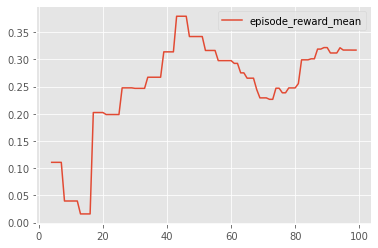

In [15]:
#Now you can plot the reward results of your tuner (same thing shows up in Tensorboard)
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [42]:
#First set up the trainer (which should really be called the "tester")

config = dqn.DEFAULT_CONFIG.copy()
config["num_workers"] = 1
#config["lr"] = grid_search([1e-4])
#config["eager"] = False
#config["num_envs_per_worker"] = 8

# config["timesteps_per_iteration"] = 100
# config["train_batch_size"] = 20

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32

2020-03-06 15:20:25,164	WARNING util.py:37 -- Install gputil for GPU system monitoring.


{'num_workers': 1,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

In [43]:
#Now restore the agent by quering the directory of the best agent from the recent tune run.
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_100/checkpoint-100"))

2020-03-06 15:20:27,489	WARNING trainable.py:210 -- Getting current IP.
2020-03-06 15:20:27,490	INFO trainable.py:416 -- Restored on 192.168.0.179 from checkpoint: /Users/jasonfiacco/ray_results/DQN16/DQN_ray_trading_env_72aed406_0_lr=0.0001_2020-03-06_13-51-11687v61n8/checkpoint_100/checkpoint-100
2020-03-06 15:20:27,491	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': 100800, '_time_total': 4351.029039144516, '_episodes_total': 134}


(pid=43320) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:
(pid=43320) 
(pid=43320) WARN: Box bound precision lowered by casting to float32
(pid=43320) 
(pid=43320) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=43320) 
(pid=43320) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=43320) 


In [29]:
#Do it with an absolute path
#trainer.restore(checkpoint_path="/Users/jasonfiacco/ray_results/DQN11/DQN_ray_trading_env_7082d0dc_0_lr=0.0001_2020-03-05_23-39-17anwa50qn/checkpoint_100/checkpoint-100")


## Testing (test on a new or the same environment)

In [46]:
#Set up a testing environment with test data.
test_env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [47]:
#Run the test. One episode only.
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state)

    while not done:
        action = trainer.compute_action(state)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

[2020-03-06 3:20:47 PM] Step: 1
[2020-03-06 3:20:50 PM] Step: 101
[2020-03-06 3:20:54 PM] Step: 201
[2020-03-06 3:20:57 PM] Step: 301
[2020-03-06 3:21:00 PM] Step: 401
[2020-03-06 3:21:03 PM] Step: 501
[2020-03-06 3:21:06 PM] Step: 601
[2020-03-06 3:21:10 PM] Step: 701
Cumulative reward:  0.03690998113361332


## Plot

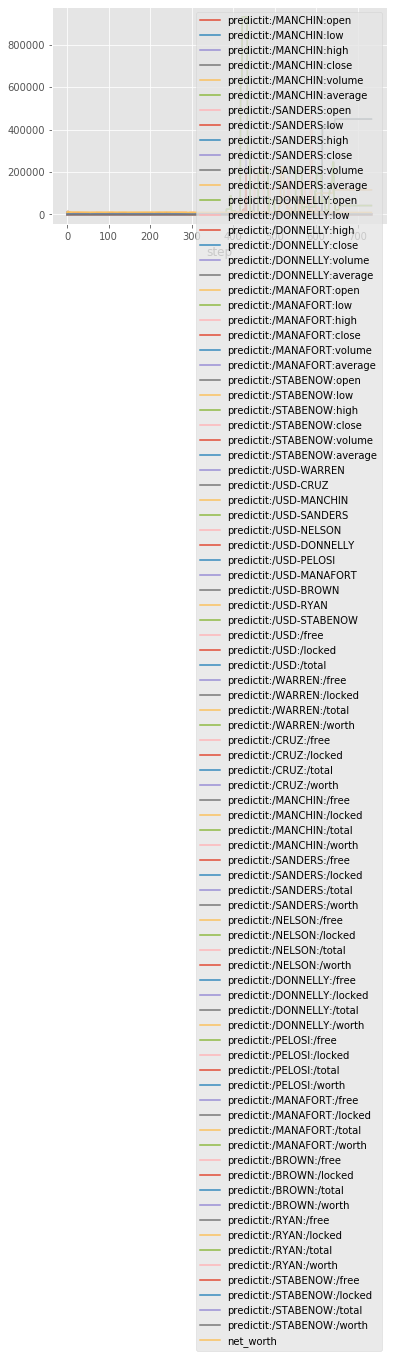

In [48]:
import matplotlib.pyplot as plt
portfolio.performance.plot()

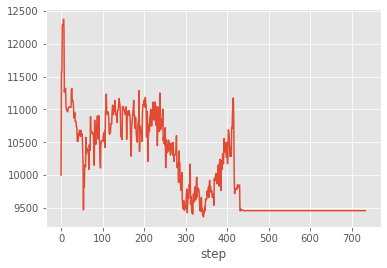

In [49]:
portfolio.performance.net_worth.plot()

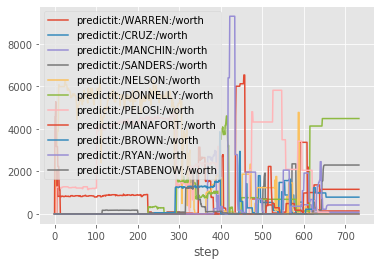

In [50]:
#Plot the total balance in each type of item
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]
weights.iloc[:, :].plot()


## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)